# Assignment 6

## Try to submit as an HTML file

<font size = "5">
Print your Emory code below

In [ ]:
# Write your answer here:

2450991

<font size = "5">

Import the "pandas", "matplotlib.pyplot", "numPy" and "statsmodels.formula.api" libraries

In [100]:
# Write your answer here:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf



<font size = "5">

(a) Functions

<font size = "3">

- Read the dataset labelled features.csv.
- Create a ``` lambda ``` function that checks if horsepower $>$ 100
- Create a new list that shows true if horsepower $>$ 100 and false <br>
if horsepower $\leq$ 100.
- Count how many cars have horsewpower $> 100$.

To get full credit use either the apply or the map function <br>
(see Lectures 7 and 8)

In [94]:
# Write your answer here
features = pd.read_csv("data/features.csv")
features



,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id
0,18.0,8,307,130,3504,12.0,C-1689780
1,15.0,8,350,165,3693,11.5,B-1689791
2,18.0,8,318,150,3436,11.0,P-1689802
3,16.0,8,304,150,3433,12.0,A-1689813
4,17.0,8,302,140,3449,10.5,F-1689824
...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103
394,44.0,4,97,52,2130,24.6,V-1694114
395,32.0,4,135,84,2295,11.6,D-1694125
396,28.0,4,120,79,2625,18.6,F-1694136


In [114]:
features["horsepower_clean"] = pd.to_numeric(features["horsepower"], errors = 'coerce')
fn_horsepower = lambda horsepower_clean: horsepower_clean > 100
horsepower_over_100 = features["horsepower_clean"].apply(fn_horsepower) 
horsepower_over_100.sum()





150

<font size = "5">

(b) Subsetting Data

<font size = "3" >

- Read the dataset labelled features.csv.
- Define a global variable called ```threshold``` that takes the <br>
value 3000
- Subset the data to get one dataset with weight $>$ threshold and <br>
another with weight $\le$ 3000. Use the ```.query()``` function.
- Compute the mean acceleration for each of these datasets.<br>

Note: Review how to define a gloabl variable inside ```.query()```
 

In [85]:
# Write your answer here:

features

# Global Variable:
threshold = 3000

# Subset 1:
subset_1 = features.query("weight > @threshold")
print(subset_1)

      mpg  cylinders  displacement horsepower  weight  acceleration vehicle_id
0    18.0          8           307        130    3504          12.0  C-1689780
1    15.0          8           350        165    3693          11.5  B-1689791
2    18.0          8           318        150    3436          11.0  P-1689802
3    16.0          8           304        150    3433          12.0  A-1689813
4    17.0          8           302        140    3449          10.5  F-1689824
..    ...        ...           ...        ...     ...           ...        ...
364  26.6          8           350        105    3725          19.0  O-1693784
365  20.2          6           200         88    3060          17.1  F-1693795
366  17.6          6           225         85    3465          16.6  C-1693806
374  23.0          4           151          ?    3035          20.5  A-1693894
387  38.0          6           262         85    3015          17.0  O-1694037

[168 rows x 7 columns]


In [86]:
# Subset 2
subset_2 = features.query("weight <= 3000")
print(subset_2)

      mpg  cylinders  displacement horsepower  weight  acceleration vehicle_id
14   24.0          4           113         95    2372          15.0  T-1689934
15   22.0          6           198         95    2833          15.5  P-1689945
16   18.0          6           199         97    2774          15.5  A-1689956
17   21.0          6           200         85    2587          16.0  F-1689967
18   27.0          4            97         88    2130          14.5  D-1689978
..    ...        ...           ...        ...     ...           ...        ...
393  27.0          4           140         86    2790          15.6  F-1694103
394  44.0          4            97         52    2130          24.6  V-1694114
395  32.0          4           135         84    2295          11.6  D-1694125
396  28.0          4           120         79    2625          18.6  F-1694136
397  31.0          4           119         82    2720          19.4  C-1694147

[230 rows x 7 columns]


In [87]:
# Mean Acceleration for Subset 1
subset_1['acceleration'].mean()

14.7

In [88]:
# Mean Acceleration for Subset 2
subset_2['acceleration'].mean()

16.202173913043477

<font size = "5">

(c) Regression

<font size = "3">

In this exercise you are asked to plot acceleration vs. weight and to plot <br>
 the best fit line.

- Run a linear regression between acceleration and weight.
- Extract the intercept and coefficient.
- Using your predicted coefficients, compute the predicted value of acceleration
- Plot a scatter plot with acceleration on the y axis and weight on the x axis.
- On that same figure, plot a line with the predicted values of acceleration

Do not forget to label your axes and title.

Intercept    19.606158
weight       -0.001359
dtype: float64


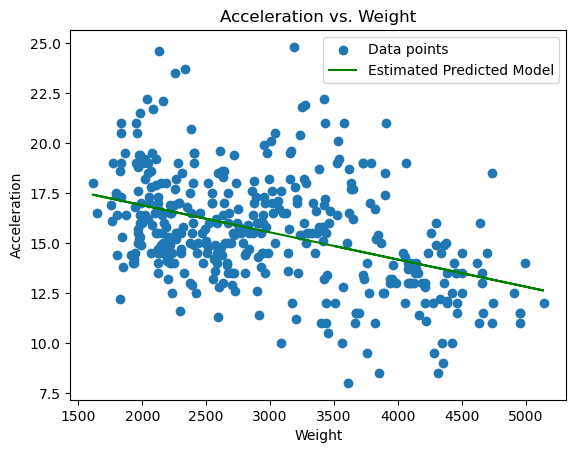

In [122]:
# Write your answer here:


model = smf.ols(formula = 'acceleration ~  weight', data = features)
results = model.fit()
results

b_list = results.params
print(b_list)
features["p_estimated"] = b_list[0] + b_list[1]  * features["weight"]

plt.scatter(x = features["weight"],y = features["acceleration"])
plt.plot(features["weight"],features["p_estimated"], color = 'green')
plt.legend(labels = ["Data points","Estimated Predicted Model"])
plt.title("Acceleration vs. Weight")
plt.ylabel("Acceleration")
plt.xlabel("Weight")
plt.show()



<font size = "5">

(d) Use sorting + ".iloc[]"

<font size = "3">

- Read the "fifa23_players_basic.csv" dataset
- Use ".sort_values()" to order the "Age" column <br>
from youngest to oldest
- Get a subset with the 5 youngest players

In [89]:
# Write your own code

fifa = pd.read_csv("Data/fifa23_players_basic.csv")
fifasorted = fifa.sort_values(by = "Age", ascending = True)
display(fifasorted)
fifasorted.iloc[[0,1,2,3,4]]


,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate
17956,A. Dithmer,Andreas Dithmer,53,76,275000,GK,GK,Denmark,https://cdn.sofifa.net/players/269/573/23_60.png,16,...,Right,2,1,1,-,https://cdn.sofifa.net/flags/dk.png,-,-,Medium,Medium
18014,J. Ardila,José Ardila,53,73,250000,CM,CAM,Venezuela,https://cdn.sofifa.net/players/268/892/23_60.png,16,...,Right,3,2,1,-,https://cdn.sofifa.net/flags/ve.png,-,-,Medium,Medium
16084,S. Ngoma,Serge Ngoma,58,82,650000,RW,RM,United States,https://cdn.sofifa.net/players/267/796/23_60.png,16,...,Right,3,2,1,-,https://cdn.sofifa.net/flags/us.png,-,-,High,Medium
11481,O. Vargas,Obed Vargas,64,81,1500000,"CM,CDM,RM",CAM,United States,https://cdn.sofifa.net/players/263/701/23_60.png,16,...,Right,3,3,1,-,https://cdn.sofifa.net/flags/us.png,-,-,High,Medium
17591,A. Madaliński,Alan Madaliński,54,68,210000,GK,GK,Poland,https://cdn.sofifa.net/players/270/590/23_60.png,16,...,Right,3,1,1,-,https://cdn.sofifa.net/flags/pl.png,-,-,Medium,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2423,Rubén Castro,Rubén Castro Martín,73,73,0,ST,ST,Spain,https://cdn.sofifa.net/players/115/909/23_60.png,41,...,Right,3,3,2,-,https://cdn.sofifa.net/flags/es.png,-,-,Medium,Low
4499,G. Pegolo,Gianluca Pegolo,70,70,180000,GK,GK,Italy,https://cdn.sofifa.net/players/106/795/23_60.png,41,...,Left,2,1,1,-,https://cdn.sofifa.net/flags/it.png,-,-,Medium,Medium
3276,S. Torrico,Sebastián Torrico,72,72,250000,GK,GK,Argentina,https://cdn.sofifa.net/players/216/692/23_60.png,42,...,Right,2,1,1,-,https://cdn.sofifa.net/flags/ar.png,-,-,Medium,Medium
13548,S. Lukić,Stojan Lukić,62,62,45000,GK,GK,Bosnia and Herzegovina,https://cdn.sofifa.net/players/213/483/23_60.png,42,...,Right,2,1,1,-,-,-,-,Medium,Medium


,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate
17956,A. Dithmer,Andreas Dithmer,53,76,275000,GK,GK,Denmark,https://cdn.sofifa.net/players/269/573/23_60.png,16,...,Right,2,1,1,-,https://cdn.sofifa.net/flags/dk.png,-,-,Medium,Medium
18014,J. Ardila,José Ardila,53,73,250000,CM,CAM,Venezuela,https://cdn.sofifa.net/players/268/892/23_60.png,16,...,Right,3,2,1,-,https://cdn.sofifa.net/flags/ve.png,-,-,Medium,Medium
16084,S. Ngoma,Serge Ngoma,58,82,650000,RW,RM,United States,https://cdn.sofifa.net/players/267/796/23_60.png,16,...,Right,3,2,1,-,https://cdn.sofifa.net/flags/us.png,-,-,High,Medium
11481,O. Vargas,Obed Vargas,64,81,1500000,"CM,CDM,RM",CAM,United States,https://cdn.sofifa.net/players/263/701/23_60.png,16,...,Right,3,3,1,-,https://cdn.sofifa.net/flags/us.png,-,-,High,Medium
17591,A. Madaliński,Alan Madaliński,54,68,210000,GK,GK,Poland,https://cdn.sofifa.net/players/270/590/23_60.png,16,...,Right,3,1,1,-,https://cdn.sofifa.net/flags/pl.png,-,-,Medium,Medium


<font size = "5">

(e) Use queries + global variables

<font size = "3">

- Read the "fifa23_players_basic.csv" dataset
- Compute the mean of the column "Value(in Euro)" <br>
and store it as a variable
- Subset the players whose value is above the mean value <br>
  using ".query()"


HINT: Remember that there is a special syntax for <br>
when the column names have spaces (see Lecture 10) <br>
Reference the column as ``` `Value(in Euro)`    ``` inside .query()

In [90]:
# Write your own code

fifa
mean_value = fifa["Value(in Euro)"].mean()
subset_abovemean = fifa.query("`Value(in Euro)` > @mean_value")
subset_abovemean

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7066,F. Rieder,Fabian Rieder,68,83,2900000,"CAM,CM",CAM,Switzerland,https://cdn.sofifa.net/players/259/306/23_60.png,20,...,Left,3,2,1,-,https://cdn.sofifa.net/flags/ch.png,-,-,High,Medium
7071,J. Bakayoko,Johan Bakayoko,68,85,3100000,RW,LM,Belgium,https://cdn.sofifa.net/players/265/450/23_60.png,19,...,Left,3,3,1,-,https://cdn.sofifa.net/flags/be.png,-,-,High,Medium
7090,M. Arezo,Matías Arezo,68,81,2900000,"ST,CAM",ST,Uruguay,https://cdn.sofifa.net/players/254/653/23_60.png,19,...,Right,3,4,1,-,https://cdn.sofifa.net/flags/uy.png,-,-,High,Medium
7096,Y. Kallon,Yayah Kallon,68,82,3000000,"RM,RW,CF",ST,Sierra Leone,https://cdn.sofifa.net/players/262/333/23_60.png,21,...,Left,2,3,1,-,-,-,-,High,Low


<font size = "5">